In [1]:
##pip install nltk

In [2]:
##nltk.download('all')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
import nltk
##nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [4]:
#Reading the data
df=pd.read_csv('reviews_final.csv')

In [5]:
df.head(30)

,Author,Source,Review,Rating
0,Hpatiluk,Official site,Generally I never review however here would li...,5
1,ApoorvSharma,Official site,What an amazing app experience and deep insigh...,5
2,AK_AK_AK,Official site,This is a game-changer and has helped me under...,5
3,Rakannan,Official site,The concept of using CGM to guide your trainin...,5
4,Nayanava,Official site,This has to be the best device after Apple Wat...,5
5,Athif Hasan,Official site,Ultrahuman M1 gave me a complete insight the i...,5
6,Ranger3010,Official site,Ultrahuman sensors are easy to wear and very e...,5
7,Srinath Rajam,Official site,...is impossible without the ability to contro...,5
8,Praneeth Pike,Official site,It’s super rare for me to write a review. And ...,5
9,Amar Salvi,Official site,Understanding how your blood sugar spikes make...,5


In [6]:
df.columns= df.columns.str.strip().str.lower()

In [7]:
df.head()

,author,source,review,rating
0,Hpatiluk,Official site,Generally I never review however here would li...,5
1,ApoorvSharma,Official site,What an amazing app experience and deep insigh...,5
2,AK_AK_AK,Official site,This is a game-changer and has helped me under...,5
3,Rakannan,Official site,The concept of using CGM to guide your trainin...,5
4,Nayanava,Official site,This has to be the best device after Apple Wat...,5


In [8]:
df['review'].values[0]

'Generally I never review however here would like to congratulate the #Ultrahuman team for this app and insight on health management. Rated 5 star as everything is awesome from onboarding, sensor delivery, app UI, activity classes, customer service, etc. Thanks!'

In [9]:
print(df.shape)

(84, 4)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   author  79 non-null     object
 1   source  84 non-null     object
 2   review  84 non-null     object
 3   rating  84 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 2.8+ KB


In [11]:
df.isnull().sum()

author    5
source    0
review    0
rating    0
dtype: int64

In [12]:
df.loc[(df['author'].isnull()),: ]

,author,source,review,rating
34,NaN,Amazon,I have completed 15 days and now I have a fair...,4
41,NaN,Amazon,I have known for a long time that it was not g...,5
57,NaN,Amazon,Poor quality assurance. Meant to have 3 sensor...,1
71,NaN,Amazon,The reliability of this product may/may not be...,1
72,NaN,Amazon,This sensor is available at half the price on ...,1


In [13]:
df['source'].unique()

array(['Official site', 'FitCart', 'Flipkart', 'Amazon'], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

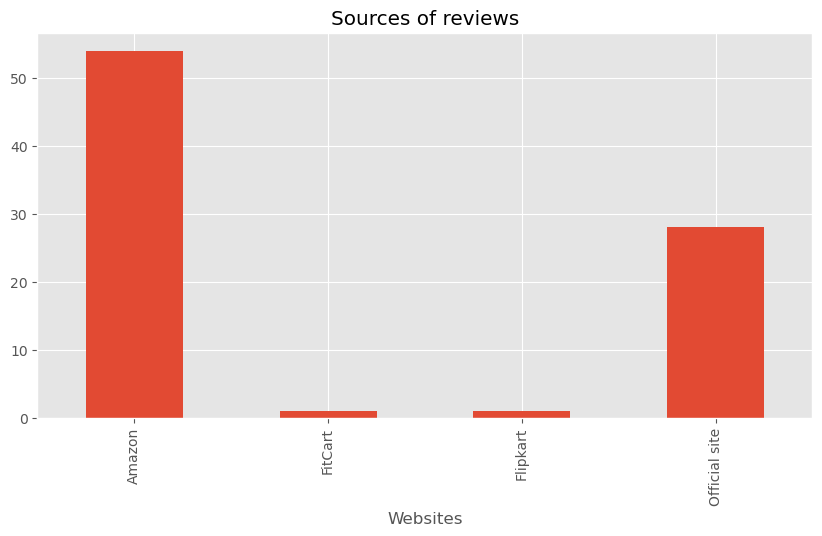

In [14]:
ax=df['source'].value_counts().sort_index().plot(kind='bar',title='Sources of reviews',figsize=(10,5))
ax.set_xlabel('Websites')
plt.show

In [15]:
review_lengths= [len(text) for text in df['review']]

In [16]:
print("longest length : ",max(review_lengths))
print("shortest length : ",min(review_lengths))
print("average length : ",sum(review_lengths)/len(review_lengths))

longest length :  3394
shortest length :  17
average length :  357.3690476190476


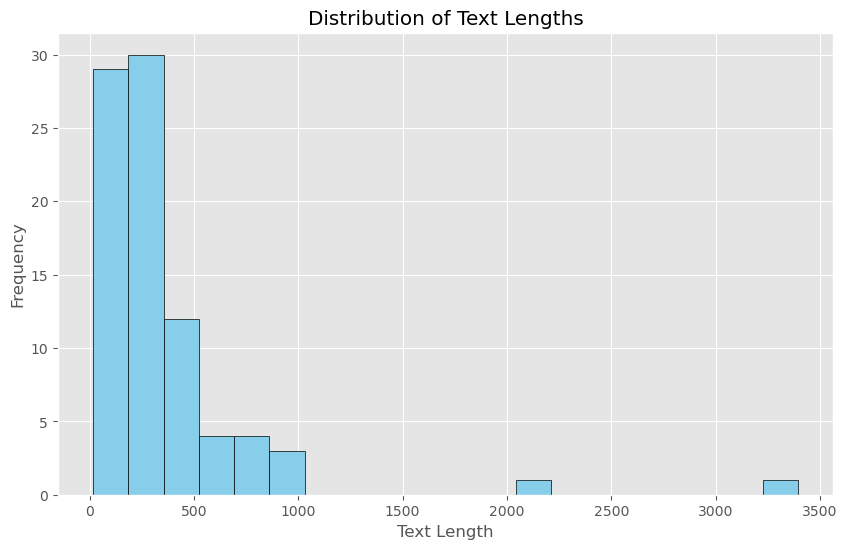

In [17]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(review_lengths, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.grid(True)
plt.show()

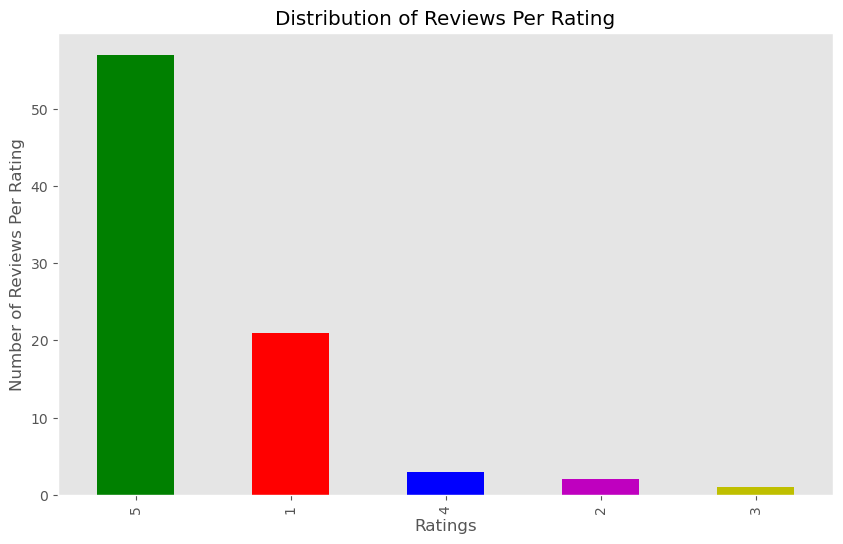

In [18]:
rating_dist = df['rating'].value_counts()

plt.figure(figsize=(10,6))
my_colors = ['g', 'r', 'b', 'm', 'y']
rating_dist.plot(kind='bar', color=my_colors)
plt.grid()
plt.xlabel("Ratings")
plt.ylabel("Number of Reviews Per Rating")
plt.title("Distribution of Reviews Per Rating")
plt.show()

# NLP

In [19]:
example=df['review'][50]
print(example)

I ordered the M1 from Amazon because it is cheaper than the Ultrahuman website listing. The actual sensor is Abott Libre, and the Ultrahuman app connects to it to show you cool insights about your Blood Glucose levels.I've been able to understand how exercise and meals affect my glucose levels and have been able to control and manage them over the week.Would recommend this to anyone looking to increase their metabolic performance or fending off Prediabetes or T2 Diabetes.


In [20]:
tokens=nltk.word_tokenize(example)
tokens

['I',
 'ordered',
 'the',
 'M1',
 'from',
 'Amazon',
 'because',
 'it',
 'is',
 'cheaper',
 'than',
 'the',
 'Ultrahuman',
 'website',
 'listing',
 '.',
 'The',
 'actual',
 'sensor',
 'is',
 'Abott',
 'Libre',
 ',',
 'and',
 'the',
 'Ultrahuman',
 'app',
 'connects',
 'to',
 'it',
 'to',
 'show',
 'you',
 'cool',
 'insights',
 'about',
 'your',
 'Blood',
 'Glucose',
 'levels.I',
 "'ve",
 'been',
 'able',
 'to',
 'understand',
 'how',
 'exercise',
 'and',
 'meals',
 'affect',
 'my',
 'glucose',
 'levels',
 'and',
 'have',
 'been',
 'able',
 'to',
 'control',
 'and',
 'manage',
 'them',
 'over',
 'the',
 'week.Would',
 'recommend',
 'this',
 'to',
 'anyone',
 'looking',
 'to',
 'increase',
 'their',
 'metabolic',
 'performance',
 'or',
 'fending',
 'off',
 'Prediabetes',
 'or',
 'T2',
 'Diabetes',
 '.']

In [21]:
tagged=nltk.pos_tag(tokens)  
tagged

[('I', 'PRP'),
 ('ordered', 'VBD'),
 ('the', 'DT'),
 ('M1', 'NNP'),
 ('from', 'IN'),
 ('Amazon', 'NNP'),
 ('because', 'IN'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('cheaper', 'JJR'),
 ('than', 'IN'),
 ('the', 'DT'),
 ('Ultrahuman', 'NNP'),
 ('website', 'NN'),
 ('listing', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('actual', 'JJ'),
 ('sensor', 'NN'),
 ('is', 'VBZ'),
 ('Abott', 'NNP'),
 ('Libre', 'NNP'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('Ultrahuman', 'NNP'),
 ('app', 'VBZ'),
 ('connects', 'NNS'),
 ('to', 'TO'),
 ('it', 'PRP'),
 ('to', 'TO'),
 ('show', 'VB'),
 ('you', 'PRP'),
 ('cool', 'JJ'),
 ('insights', 'NNS'),
 ('about', 'IN'),
 ('your', 'PRP$'),
 ('Blood', 'NNP'),
 ('Glucose', 'NNP'),
 ('levels.I', 'VBD'),
 ("'ve", 'VBP'),
 ('been', 'VBN'),
 ('able', 'JJ'),
 ('to', 'TO'),
 ('understand', 'VB'),
 ('how', 'WRB'),
 ('exercise', 'NN'),
 ('and', 'CC'),
 ('meals', 'NNS'),
 ('affect', 'VBP'),
 ('my', 'PRP$'),
 ('glucose', 'JJ'),
 ('levels', 'NNS'),
 ('and', 'CC'),
 ('have', 'VBP'),
 ('b

In [22]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  ordered/VBD
  the/DT
  M1/NNP
  from/IN
  (GPE Amazon/NNP)
  because/IN
  it/PRP
  is/VBZ
  cheaper/JJR
  than/IN
  the/DT
  (ORGANIZATION Ultrahuman/NNP)
  website/NN
  listing/NN
  ./.
  The/DT
  actual/JJ
  sensor/NN
  is/VBZ
  (PERSON Abott/NNP Libre/NNP)
  ,/,
  and/CC
  the/DT
  (ORGANIZATION Ultrahuman/NNP)
  app/VBZ
  connects/NNS
  to/TO
  it/PRP
  to/TO
  show/VB
  you/PRP
  cool/JJ
  insights/NNS
  about/IN
  your/PRP$
  (PERSON Blood/NNP Glucose/NNP)
  levels.I/VBD
  've/VBP
  been/VBN
  able/JJ
  to/TO
  understand/VB
  how/WRB
  exercise/NN
  and/CC
  meals/NNS
  affect/VBP
  my/PRP$
  glucose/JJ
  levels/NNS
  and/CC
  have/VBP
  been/VBN
  able/JJ
  to/TO
  control/VB
  and/CC
  manage/VB
  them/PRP
  over/RP
  the/DT
  week.Would/JJ
  recommend/NN
  this/DT
  to/TO
  anyone/NN
  looking/VBG
  to/TO
  increase/VB
  their/PRP$
  metabolic/JJ
  performance/NN
  or/CC
  fending/VBG
  off/RP
  Prediabetes/NNS
  or/CC
  (ORGANIZATION T2/NNP Diabetes/NNPS)
  ./.)

# VADER


We will use NLTK's SentimentIntensityAnalyzer to get nuetral, positive or negetive score
this uses a "individual words" approach
- Stop words are removed
- Each word is scored individually and combined to a total score
- Does'nt account for relation between words

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()

In [24]:
sia

In [25]:
#good review
ex1 = df['review'][10]
print(ex1)
scores = sia.polarity_scores(ex1)
print(scores)

Love the app, essential for my daily life. Perfect. I should invest in Ultrahuman
{'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'compound': 0.836}


In [26]:
#bad review
ex2 = df['review'][35]
print(ex2)
scores = sia.polarity_scores(ex2)
print(scores)

Received package on 31st March 2024 with Freestyle Libre sensor package reading expiry of March 2024 rendering it useless to install.Being non-returnable, this is a reportable malpractice.Hope Ultraguman takes note of the same.
{'neg': 0.081, 'neu': 0.87, 'pos': 0.049, 'compound': -0.2732}


In [27]:
#run polarity score on entire data set
res={}
for i, row in df.iterrows():
    review = row['review']
    author = row['author']
    res[author] = sia.polarity_scores(review)

In [28]:
vaders=pd.DataFrame(res).T
#.T flips it horizontally
vaders

,neg,neu,pos,compound
Hpatiluk,0.000,0.724,0.276,0.9184
ApoorvSharma,0.000,0.788,0.212,0.8908
AK_AK_AK,0.000,0.649,0.351,0.9538
Rakannan,0.000,0.764,0.236,0.7346
Nayanava,0.000,0.783,0.217,0.9335
...,...,...,...,...
Vikram Vaidya,0.000,1.000,0.000,0.0000
silvia m.,0.000,1.000,0.000,0.0000
Klaus,0.000,0.853,0.147,0.8537
Hari Hemachandran,0.119,0.815,0.066,-0.3400


In [29]:
vaders=vaders.reset_index().rename(columns={'index':'author'})
vaders=vaders.merge(df,how='right')

In [30]:
#sentiment score added to the  df
vaders.head()

,author,neg,neu,pos,compound,source,review,rating
0,Hpatiluk,0.0,0.724,0.276,0.9184,Official site,Generally I never review however here would li...,5
1,ApoorvSharma,0.0,0.788,0.212,0.8908,Official site,What an amazing app experience and deep insigh...,5
2,AK_AK_AK,0.0,0.649,0.351,0.9538,Official site,This is a game-changer and has helped me under...,5
3,Rakannan,0.0,0.764,0.236,0.7346,Official site,The concept of using CGM to guide your trainin...,5
4,Nayanava,0.0,0.783,0.217,0.9335,Official site,This has to be the best device after Apple Wat...,5


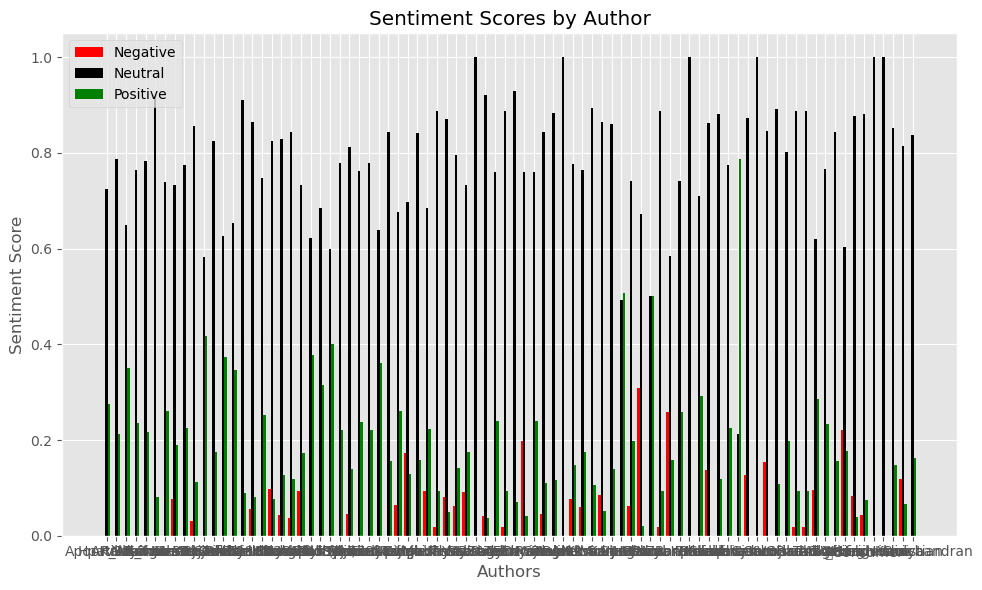

In [31]:
# Extracting data from DataFrame
authors = vaders['author']
neg_scores = vaders['neg']
neu_scores = vaders['neu']
pos_scores = vaders['pos']

# Plotting the grouped bar chart
bar_width = 0.25
index = np.arange(len(authors))

plt.figure(figsize=(10, 6))
plt.bar(index, neg_scores, bar_width, label='Negative', color='red')
plt.bar(index + bar_width, neu_scores, bar_width, label='Neutral', color='black')
plt.bar(index + 2 * bar_width, pos_scores, bar_width, label='Positive', color='green')
plt.xlabel('Authors')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores by Author')
plt.xticks(index + bar_width, authors)
plt.legend()
plt.tight_layout()
plt.show()



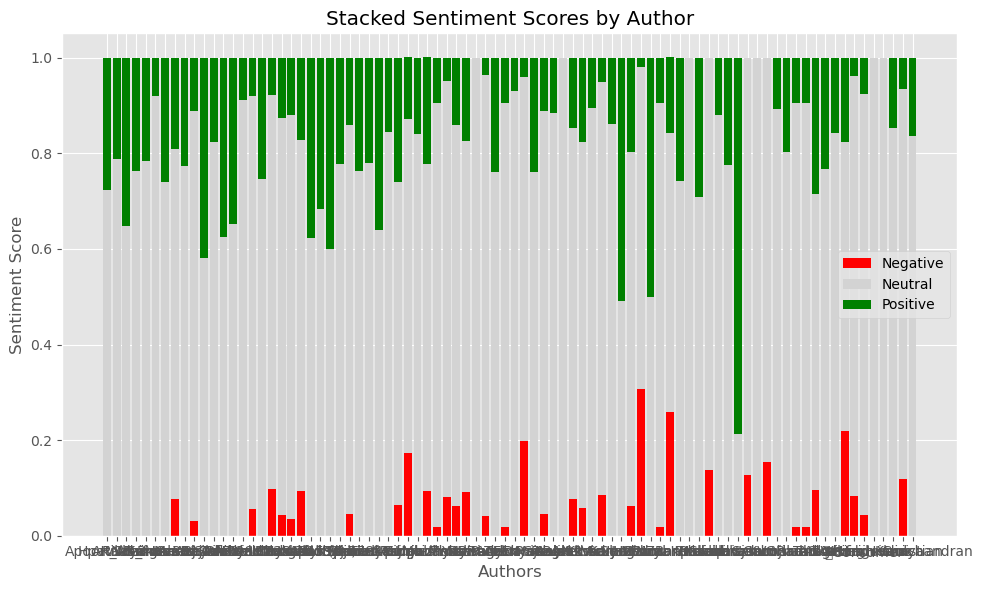

In [32]:
# Extracting data from DataFrame
authors = vaders['author']
neg_scores = vaders['neg']
neu_scores = vaders['neu']
pos_scores = vaders['pos']

# Plotting the stacked bar chart
index = np.arange(len(authors))

plt.figure(figsize=(10, 6))
plt.bar(index, neg_scores, label='Negative', color='red')
plt.bar(index, neu_scores, bottom=neg_scores, label='Neutral', color='lightgrey')
plt.bar(index, pos_scores, bottom=neg_scores + neu_scores, label='Positive', color='green')
plt.xlabel('Authors')
plt.ylabel('Sentiment Score')
plt.title('Stacked Sentiment Scores by Author')
plt.xticks(index, authors)
plt.legend()
plt.tight_layout()
plt.show()

In [33]:
# Calculate average sentiment scores
average_scores = {
    'pos': vaders['pos'].mean(),
    'neg': vaders['neg'].mean(),
    'neu': vaders['neu'].mean()
}

print("Average Sentiment Scores:")
print(average_scores)

Average Sentiment Scores:
{'pos': 0.17401190476190478, 'neg': 0.038785714285714284, 'neu': 0.7871904761904761}


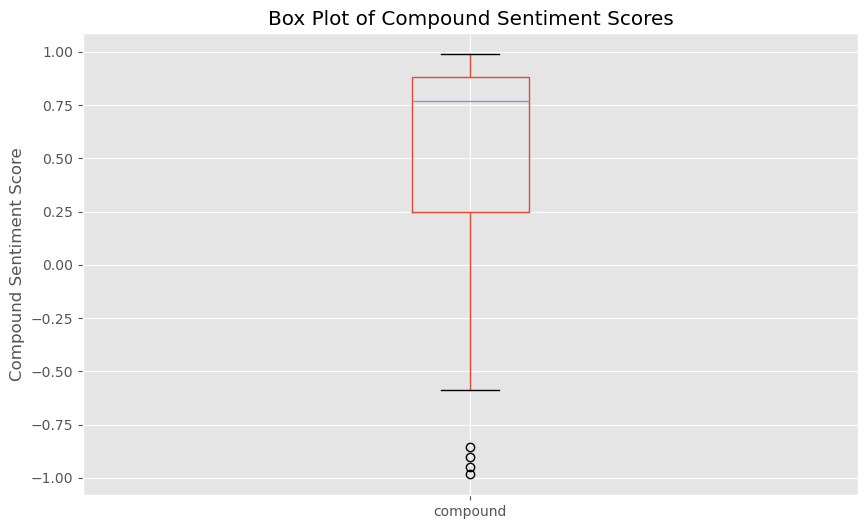

In [34]:
column_name = 'compound'
plt.figure(figsize=(10, 6))
vaders.boxplot(column=column_name)
plt.title('Box Plot of Compound Sentiment Scores')
plt.ylabel('Compound Sentiment Score')
plt.show()

In [35]:
sorted_compound = vaders['compound'].sort_values()
print(sorted_compound)

55   -0.9836
77   -0.9482
31   -0.9020
43   -0.8555
66   -0.5875
       ...  
13    0.9687
32    0.9740
12    0.9796
11    0.9815
16    0.9884
Name: compound, Length: 84, dtype: float64


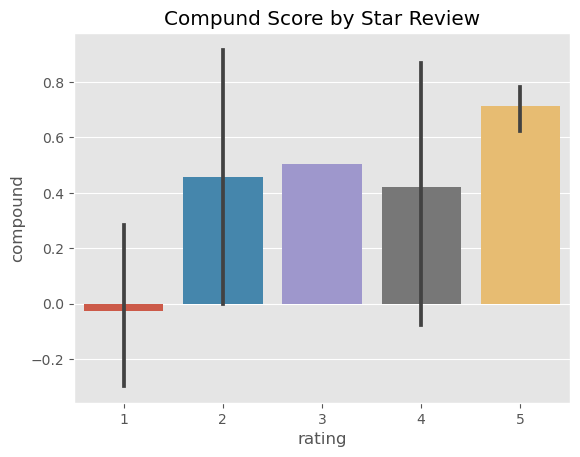

In [36]:
ax = sns.barplot(data=vaders, x='rating', y='compound')
ax.set_title('Compund Score by Star Review')
plt.show()

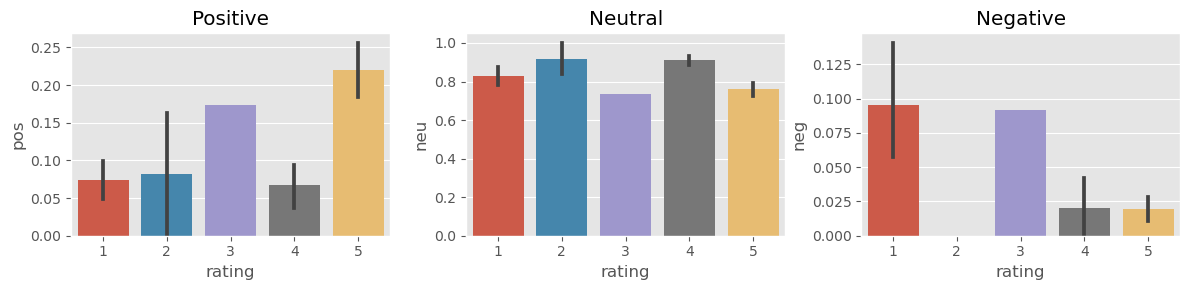

In [37]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()

In [38]:
##pip install transformers
#pip install torch torchvision torchaudio
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch

# Roberta Pretrained Model
- uses a model trained with large amount of data
- accounts for the words but also the context related to other words

In [39]:
import os
os.environ['HF_HUB_DISABLE_SYMLINKS_WARNING'] = '1'

In [40]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [41]:
#Vaders results
print(ex1)
sia.polarity_scores(ex1)

Love the app, essential for my daily life. Perfect. I should invest in Ultrahuman


{'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'compound': 0.836}

In [42]:
# Run for Roberta Model
encoded_text = tokenizer(ex1, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0016438591, 'roberta_neu': 0.00875144, 'roberta_pos': 0.9896047}


In [43]:
def polarity_scores_roberta(x):
    encoded_text = tokenizer(x, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [44]:
from tqdm.notebook import tqdm

In [45]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['review']
        id = row['author']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[id] = both
    except RuntimeError:
        print(f'Broke for id {id}')

  0%|          | 0/84 [00:00<?, ?it/s]

Broke for id 	Consumer


In [46]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'author'})
results_df

,author,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,Hpatiluk,0.000,0.724,0.276,0.9184,0.002662,0.014264,0.983074
1,ApoorvSharma,0.000,0.788,0.212,0.8908,0.004499,0.027363,0.968138
2,AK_AK_AK,0.000,0.649,0.351,0.9538,0.001470,0.012130,0.986400
3,Rakannan,0.000,0.764,0.236,0.7346,0.001717,0.023857,0.974427
4,Nayanava,0.000,0.783,0.217,0.9335,0.015158,0.084716,0.900126
...,...,...,...,...,...,...,...,...
74,Vikram Vaidya,0.000,1.000,0.000,0.0000,0.013244,0.310126,0.676630
75,silvia m.,0.000,1.000,0.000,0.0000,0.475504,0.493343,0.031153
76,Klaus,0.000,0.853,0.147,0.8537,0.183561,0.546782,0.269657
77,Hari Hemachandran,0.119,0.815,0.066,-0.3400,0.555197,0.353258,0.091545


In [47]:
results_df = pd.merge(results_df, df[['author','review','rating']], on='author', how='inner')
results_df

,author,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,review,rating
0,Hpatiluk,0.000,0.724,0.276,0.9184,0.002662,0.014264,0.983074,Generally I never review however here would li...,5
1,ApoorvSharma,0.000,0.788,0.212,0.8908,0.004499,0.027363,0.968138,What an amazing app experience and deep insigh...,5
2,AK_AK_AK,0.000,0.649,0.351,0.9538,0.001470,0.012130,0.986400,This is a game-changer and has helped me under...,5
3,Rakannan,0.000,0.764,0.236,0.7346,0.001717,0.023857,0.974427,The concept of using CGM to guide your trainin...,5
4,Nayanava,0.000,0.783,0.217,0.9335,0.015158,0.084716,0.900126,This has to be the best device after Apple Wat...,5
...,...,...,...,...,...,...,...,...,...,...
78,Vikram Vaidya,0.000,1.000,0.000,0.0000,0.013244,0.310126,0.676630,Tchnically very high quality,5
79,silvia m.,0.000,1.000,0.000,0.0000,0.475504,0.493343,0.031153,In the package there are 2 sensors but one of ...,1
80,Klaus,0.000,0.853,0.147,0.8537,0.183561,0.546782,0.269657,The sensor or the product might be good. I can...,1
81,Hari Hemachandran,0.119,0.815,0.066,-0.3400,0.555197,0.353258,0.091545,I have type 2 diabetes and I always struggled ...,5


In [48]:
roberta_df = results_df.drop(columns=['vader_neg', 'vader_neu', 'vader_pos','vader_compound'])

In [49]:
roberta_df

,author,roberta_neg,roberta_neu,roberta_pos,review,rating
0,Hpatiluk,0.002662,0.014264,0.983074,Generally I never review however here would li...,5
1,ApoorvSharma,0.004499,0.027363,0.968138,What an amazing app experience and deep insigh...,5
2,AK_AK_AK,0.001470,0.012130,0.986400,This is a game-changer and has helped me under...,5
3,Rakannan,0.001717,0.023857,0.974427,The concept of using CGM to guide your trainin...,5
4,Nayanava,0.015158,0.084716,0.900126,This has to be the best device after Apple Wat...,5
...,...,...,...,...,...,...
78,Vikram Vaidya,0.013244,0.310126,0.676630,Tchnically very high quality,5
79,silvia m.,0.475504,0.493343,0.031153,In the package there are 2 sensors but one of ...,1
80,Klaus,0.183561,0.546782,0.269657,The sensor or the product might be good. I can...,1
81,Hari Hemachandran,0.555197,0.353258,0.091545,I have type 2 diabetes and I always struggled ...,5


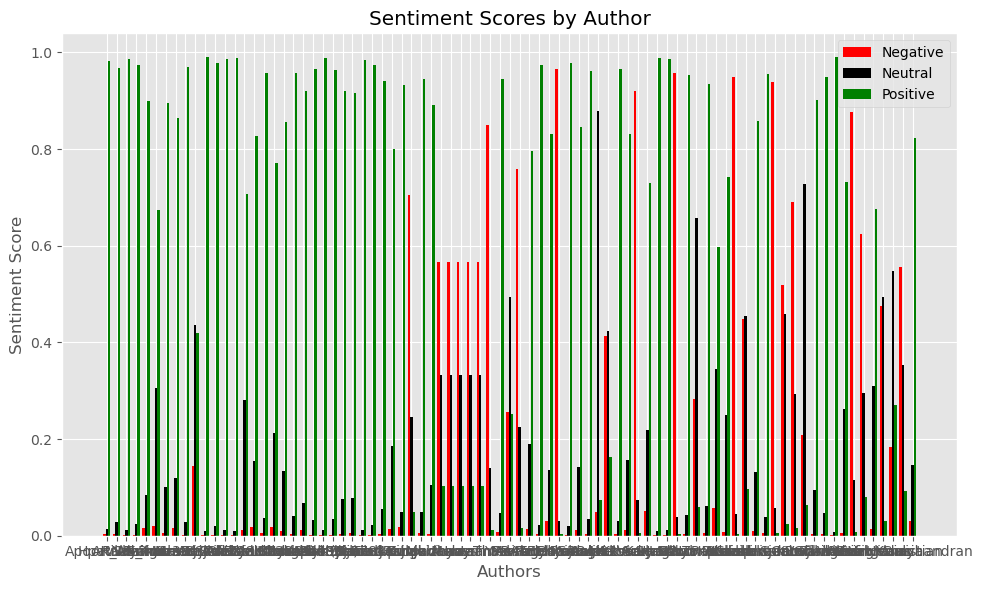

In [50]:
authors = roberta_df['author']
neg_scores = roberta_df['roberta_neg']
neu_scores = roberta_df['roberta_neu']
pos_scores = roberta_df['roberta_pos']

# Plotting the grouped bar chart
bar_width = 0.25
index = np.arange(len(authors))

plt.figure(figsize=(10, 6))
plt.bar(index, neg_scores, bar_width, label='Negative', color='red')
plt.bar(index + bar_width, neu_scores, bar_width, label='Neutral', color='black')
plt.bar(index + 2 * bar_width, pos_scores, bar_width, label='Positive', color='green')
plt.xlabel('Authors')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores by Author')
plt.xticks(index + bar_width, authors)
plt.legend()
plt.tight_layout()
plt.show()

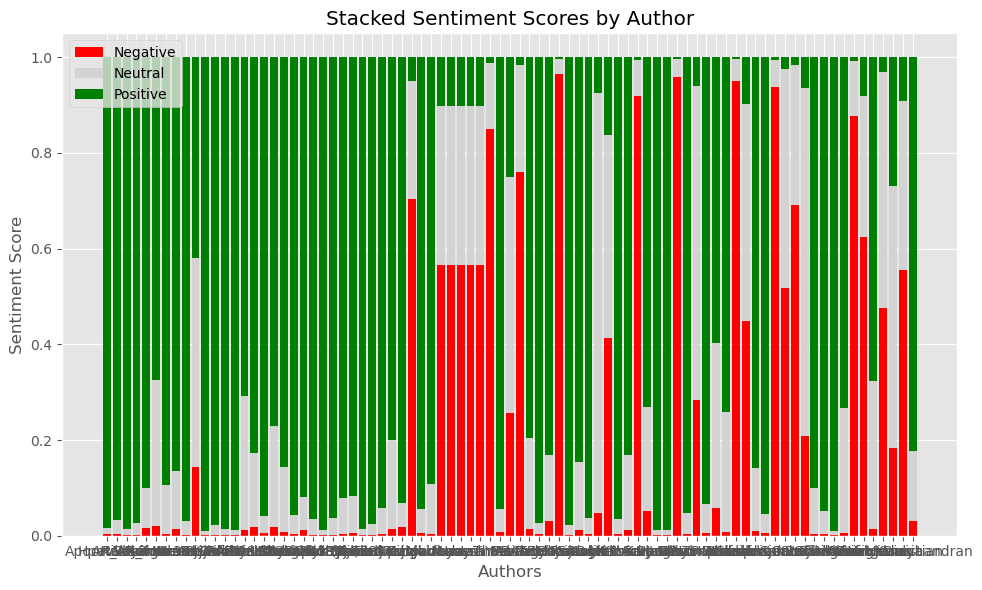

In [51]:
authors = roberta_df['author']
neg_scores = roberta_df['roberta_neg']
neu_scores = roberta_df['roberta_neu']
pos_scores = roberta_df['roberta_pos']

# Plotting the stacked bar chart
index = np.arange(len(authors))

plt.figure(figsize=(10, 6))
plt.bar(index, neg_scores, label='Negative', color='red')
plt.bar(index, neu_scores, bottom=neg_scores, label='Neutral', color='lightgrey')
plt.bar(index, pos_scores, bottom=neg_scores + neu_scores, label='Positive', color='green')
plt.xlabel('Authors')
plt.ylabel('Sentiment Score')
plt.title('Stacked Sentiment Scores by Author')
plt.xticks(index, authors)
plt.legend()
plt.tight_layout()
plt.show()

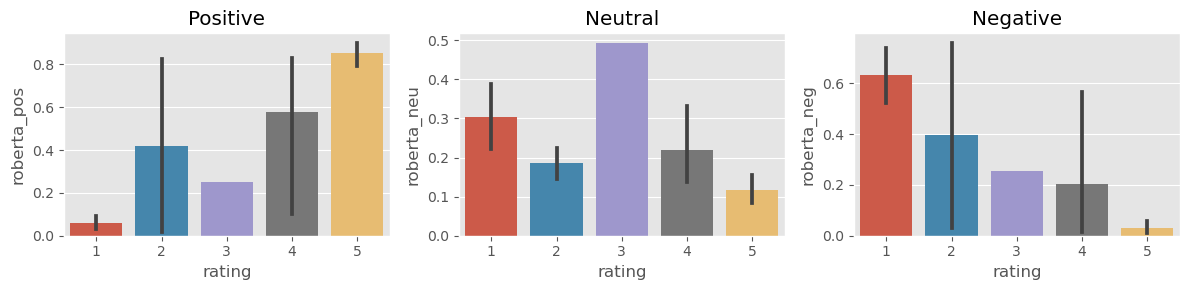

In [52]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=roberta_df, x='rating', y='roberta_pos', ax=axs[0])
sns.barplot(data=roberta_df, x='rating', y='roberta_neu', ax=axs[1])
sns.barplot(data=roberta_df, x='rating', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()

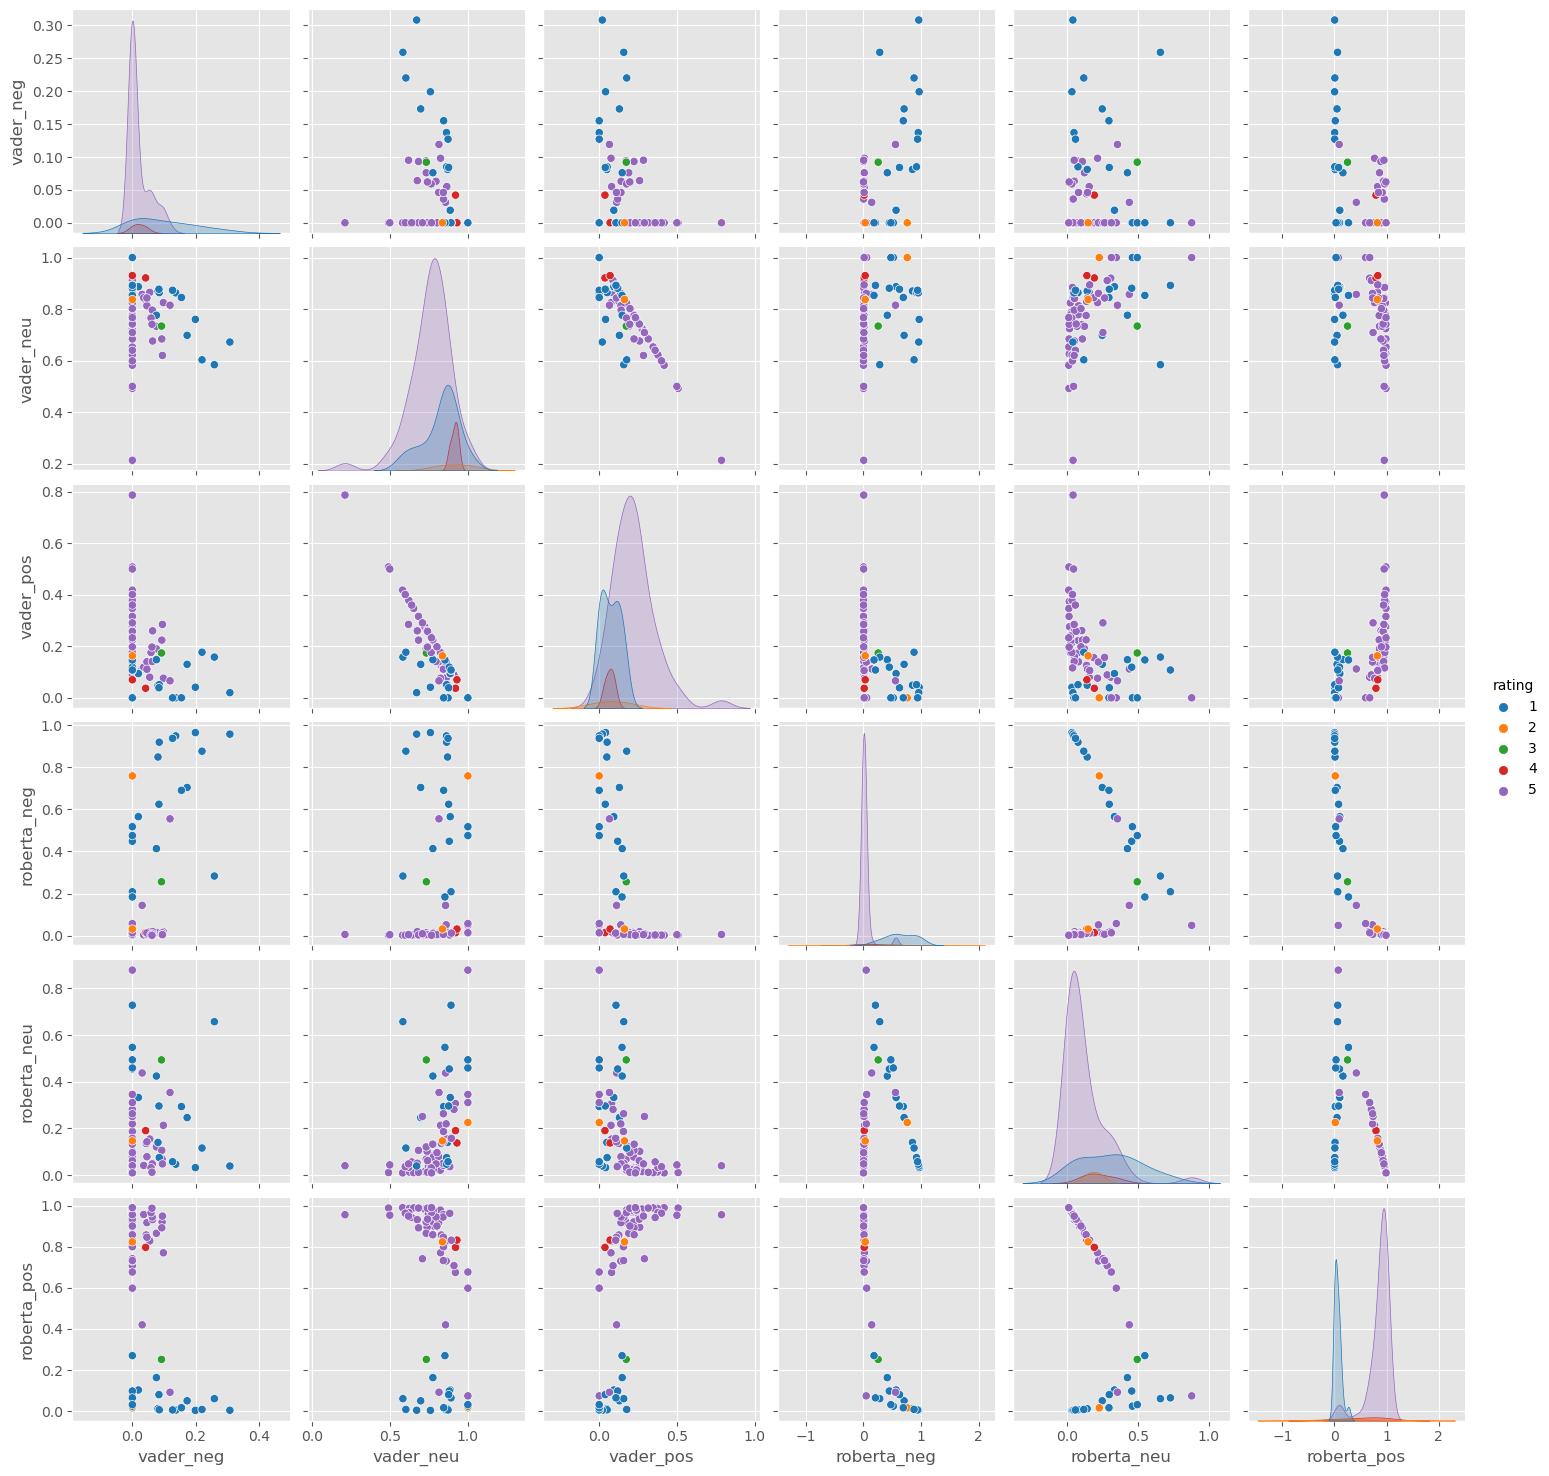

In [53]:
#combine and compare
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='rating',
            palette='tab10')
plt.show()

In [54]:
# Function to calculate the compound score
def calculate_compound(row):
    compound = (row['roberta_pos'] * 1) + (row['roberta_neu'] * 0) + (row['roberta_neg'] * -1)
    return compound

# Apply the function to each row in the DataFrame and create a new 'compound' column
roberta_df['compound'] = roberta_df.apply(calculate_compound, axis=1)

In [55]:
roberta_df

,author,roberta_neg,roberta_neu,roberta_pos,review,rating,compound
0,Hpatiluk,0.002662,0.014264,0.983074,Generally I never review however here would li...,5,0.980412
1,ApoorvSharma,0.004499,0.027363,0.968138,What an amazing app experience and deep insigh...,5,0.963639
2,AK_AK_AK,0.001470,0.012130,0.986400,This is a game-changer and has helped me under...,5,0.984930
3,Rakannan,0.001717,0.023857,0.974427,The concept of using CGM to guide your trainin...,5,0.972710
4,Nayanava,0.015158,0.084716,0.900126,This has to be the best device after Apple Wat...,5,0.884967
...,...,...,...,...,...,...,...
78,Vikram Vaidya,0.013244,0.310126,0.676630,Tchnically very high quality,5,0.663386
79,silvia m.,0.475504,0.493343,0.031153,In the package there are 2 sensors but one of ...,1,-0.444351
80,Klaus,0.183561,0.546782,0.269657,The sensor or the product might be good. I can...,1,0.086096
81,Hari Hemachandran,0.555197,0.353258,0.091545,I have type 2 diabetes and I always struggled ...,5,-0.463652


In [56]:
def classify_sentiment(compound):
    if compound > 0:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the classification function to each row and add 'sentiment' column
roberta_df['sentiment'] = roberta_df['compound'].apply(classify_sentiment)

In [57]:
roberta_df

,author,roberta_neg,roberta_neu,roberta_pos,review,rating,compound,sentiment
0,Hpatiluk,0.002662,0.014264,0.983074,Generally I never review however here would li...,5,0.980412,Positive
1,ApoorvSharma,0.004499,0.027363,0.968138,What an amazing app experience and deep insigh...,5,0.963639,Positive
2,AK_AK_AK,0.001470,0.012130,0.986400,This is a game-changer and has helped me under...,5,0.984930,Positive
3,Rakannan,0.001717,0.023857,0.974427,The concept of using CGM to guide your trainin...,5,0.972710,Positive
4,Nayanava,0.015158,0.084716,0.900126,This has to be the best device after Apple Wat...,5,0.884967,Positive
...,...,...,...,...,...,...,...,...
78,Vikram Vaidya,0.013244,0.310126,0.676630,Tchnically very high quality,5,0.663386,Positive
79,silvia m.,0.475504,0.493343,0.031153,In the package there are 2 sensors but one of ...,1,-0.444351,Negative
80,Klaus,0.183561,0.546782,0.269657,The sensor or the product might be good. I can...,1,0.086096,Positive
81,Hari Hemachandran,0.555197,0.353258,0.091545,I have type 2 diabetes and I always struggled ...,5,-0.463652,Negative


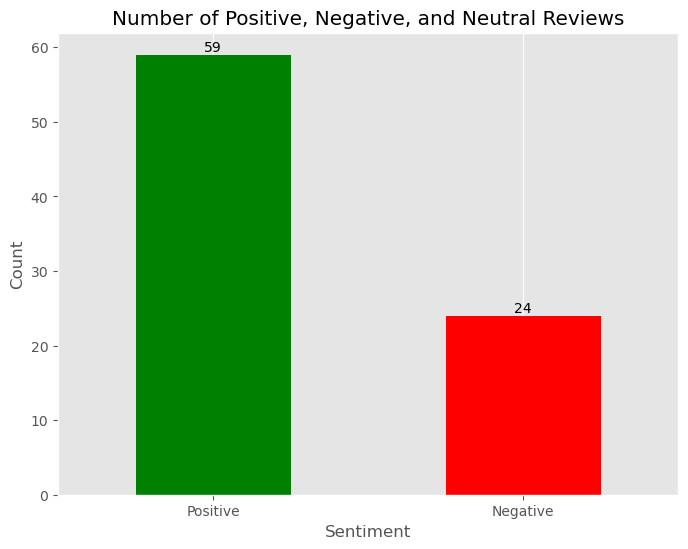

In [58]:
sentiment_counts = roberta_df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Number of Positive, Negative, and Neutral Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adding counts above bars
for i in range(len(sentiment_counts)):
    plt.text(i, sentiment_counts[i], str(sentiment_counts[i]), ha='center', va='bottom')

plt.show()

In [59]:
#1 star review with highest roberta postivity score
results_df.query('rating==1').sort_values('roberta_pos',ascending=False)['review'].values[0]

'The sensor or the product might be good. I can’t say - I am only using it for a day. But what everyone needs to know is: what you buy here is a sensor that will only work for 2 weeks. After that you need to buy a subscription that effectively coasts more than 2000€ per year. If you are prepared to do that I guess it’s fine to buy - otherwise don’t.'

In [60]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [61]:
sent_pipeline(ex1)

[{'label': 'POSITIVE', 'score': 0.9998007416725159}]

In [62]:
sent_pipeline(ex2)

[{'label': 'NEGATIVE', 'score': 0.9995502829551697}]

# BERT

In [63]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [64]:
tokens = tokenizer.encode(ex1, return_tensors='pt')

In [65]:
ex1

'Love the app, essential for my daily life. Perfect. I should invest in Ultrahuman'

In [66]:
tokens

tensor([[  101, 11157, 10103, 35821,   117, 32977, 10139, 11153, 15185, 10287,
           119, 23021,   119,   151, 14693, 10104, 39368, 10104, 29799, 31737,
         10208,   102]])

In [67]:
tokenizer.decode(tokens[0])

'[CLS] love the app, essential for my daily life. perfect. i should invest in ultrahuman [SEP]'

In [68]:
result = model(tokens)

In [69]:
result.logits
#the highest value represent the actual sentiment

tensor([[-2.6116, -2.8095, -1.3415,  1.5306,  4.1581]],
       grad_fn=<AddmmBackward0>)

In [70]:
int(torch.argmax(result.logits))+1
#adds 1 as it starts from 0 but the ratings are from 1 to 5

5

In [71]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [72]:
bert_df = df.copy()

In [73]:
bert_df['sentiment'] = bert_df['review'].apply(lambda x: sentiment_score(x[:512]))

In [74]:
bert_df

,author,source,review,rating,sentiment
0,Hpatiluk,Official site,Generally I never review however here would li...,5,5
1,ApoorvSharma,Official site,What an amazing app experience and deep insigh...,5,5
2,AK_AK_AK,Official site,This is a game-changer and has helped me under...,5,5
3,Rakannan,Official site,The concept of using CGM to guide your trainin...,5,5
4,Nayanava,Official site,This has to be the best device after Apple Wat...,5,5
...,...,...,...,...,...
79,Vikram Vaidya,Amazon,Tchnically very high quality,5,5
80,silvia m.,Amazon,In the package there are 2 sensors but one of ...,1,1
81,Klaus,Amazon,The sensor or the product might be good. I can...,1,2
82,Hari Hemachandran,Amazon,I have type 2 diabetes and I always struggled ...,5,5


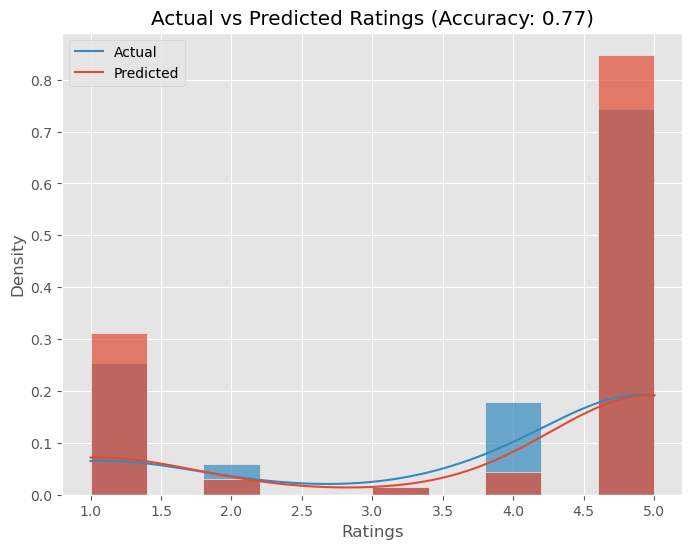

In [75]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(bert_df['rating'], bert_df['sentiment'])

# Plotting the accuracy
plt.figure(figsize=(8, 6))
sns.histplot(bert_df[['rating', 'sentiment']], bins=10, kde=True, alpha=0.7, stat='density')
plt.title(f'Actual vs Predicted Ratings (Accuracy: {accuracy:.2f})')
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.legend(['Actual', 'Predicted'])
plt.show()

# TextBlob

In [76]:
def corpu(em, Text):
    lemma = WordNetLemmatizer()
    
    corpus=[]
    
    for i in range(len(em)):
        msg = re.sub('[^a-zA-Z]', ' ',em[Text][i])
        msg = msg.lower()
        msg = msg.split()
        
        msg = [lemma.lemmatize(i) for i in msg if i not in stopwords.words('english')]
        msg = ' '.join(msg)
        corpus.append(msg)
        
    return corpus

In [77]:
corpus = corpu(df,'review')
corpus

['generally never review however would like congratulate ultrahuman team app insight health management rated star everything awesome onboarding sensor delivery app ui activity class customer service etc thanks',
 'amazing app experience deep insight body work truly go show body different nutrition impact u strongly recommend trying least life never',
 'game changer helped understand multiple aspect metabolic health made conscious way eat eat also ultrahuman team super super responsive helpful really loving experience',
 'concept using cgm guide training food plan brilliant app also well laid',
 'best device apple watch help track blood glucose level turn helping maintain healthy lifestyle allowing make right food choice staying away others kind become like challenge maintain blood glucose level throughout day quit almost food added sugar',
 'ultrahuman gave complete insight impact every food body follow fancy diet yet managed educate around food built sustainable healthy lifestyle',
 '

In [78]:
def word_tok(corpus):
    word = []
    
    for i in corpus:
        words = word_tokenize(i)
        word.append(words)
        
    return word

In [79]:
word = word_tok(corpus)
word

[['generally',
  'never',
  'review',
  'however',
  'would',
  'like',
  'congratulate',
  'ultrahuman',
  'team',
  'app',
  'insight',
  'health',
  'management',
  'rated',
  'star',
  'everything',
  'awesome',
  'onboarding',
  'sensor',
  'delivery',
  'app',
  'ui',
  'activity',
  'class',
  'customer',
  'service',
  'etc',
  'thanks'],
 ['amazing',
  'app',
  'experience',
  'deep',
  'insight',
  'body',
  'work',
  'truly',
  'go',
  'show',
  'body',
  'different',
  'nutrition',
  'impact',
  'u',
  'strongly',
  'recommend',
  'trying',
  'least',
  'life',
  'never'],
 ['game',
  'changer',
  'helped',
  'understand',
  'multiple',
  'aspect',
  'metabolic',
  'health',
  'made',
  'conscious',
  'way',
  'eat',
  'eat',
  'also',
  'ultrahuman',
  'team',
  'super',
  'super',
  'responsive',
  'helpful',
  'really',
  'loving',
  'experience'],
 ['concept',
  'using',
  'cgm',
  'guide',
  'training',
  'food',
  'plan',
  'brilliant',
  'app',
  'also',
  'well',
  

In [80]:
def wordcloud(data):
    txt = ' '.join(data)
    stop = stop_words
    
    wc = WordCloud(background_color="white", stopwords = stop).generate(txt)
    plt.imshow(wc)
    plt.axis('off')
    plt.title('wordcloud', size = 50)

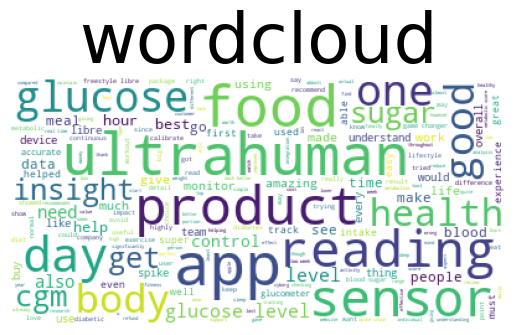

In [81]:
wordcloud(corpus)

In [82]:
df_corpus = pd.DataFrame(corpus, columns = ['txt'])
df_corpus

,txt
0,generally never review however would like cong...
1,amazing app experience deep insight body work ...
2,game changer helped understand multiple aspect...
3,concept using cgm guide training food plan bri...
4,best device apple watch help track blood gluco...
...,...
79,tchnically high quality
80,package sensor one two expired february second...
81,sensor product might good say using day everyo...
82,type diabetes always struggled get sugar low p...


In [83]:
df_corpus['sentiment']=df_corpus['txt'].apply(lambda x : TextBlob(x).sentiment.polarity)
df_corpus

,txt,sentiment
0,generally never review however would like cong...,0.391667
1,amazing app experience deep insight body work ...,0.146667
2,game changer helped understand multiple aspect...,0.161111
3,concept using cgm guide training food plan bri...,0.900000
4,best device apple watch help track blood gluco...,0.596429
...,...,...
79,tchnically high quality,0.160000
80,package sensor one two expired february second...,0.000000
81,sensor product might good say using day everyo...,0.572222
82,type diabetes always struggled get sugar low p...,0.147619


In [84]:
def assign_Result(ratings):
    if ratings < 0:
        result = 'negative'
    elif ratings >= 0:
            result = 'positive'
            
    return result

In [85]:
df_corpus['review_sentiment']=df_corpus['sentiment'].apply(assign_Result)
df_corpus

,txt,sentiment,review_sentiment
0,generally never review however would like cong...,0.391667,positive
1,amazing app experience deep insight body work ...,0.146667,positive
2,game changer helped understand multiple aspect...,0.161111,positive
3,concept using cgm guide training food plan bri...,0.900000,positive
4,best device apple watch help track blood gluco...,0.596429,positive
...,...,...,...
79,tchnically high quality,0.160000,positive
80,package sensor one two expired february second...,0.000000,positive
81,sensor product might good say using day everyo...,0.572222,positive
82,type diabetes always struggled get sugar low p...,0.147619,positive


<Axes: ylabel='review_sentiment'>

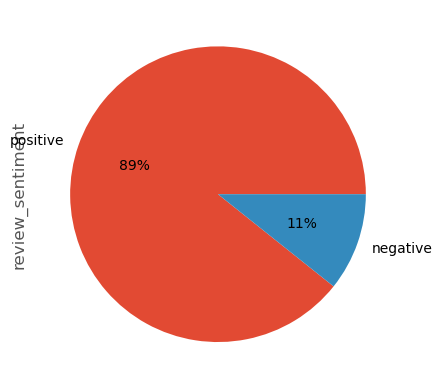

In [86]:
df_corpus['review_sentiment'].value_counts().plot(kind='pie', autopct = '%1.00f%%')